# PCA Using Power Iteration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# implement my own PCA
class MyPCA:
    def __init__(self):
        self.e_values = [] # list of eigenvalues (decreasing order)
        self.e_vectors = [] # list of eigenvectors ( principal directions )
        self.PCs = [] # principal components (scores)
    
    # find the first k PCs of data matrix X (n*p), n data and p features
    def fit(self, X, k, n_iter):
        n, p = X.shape
        
        Xcentered = X - np.matlib.repmat( X.mean(0), n, 1) # centered data
        XX = Xcentered.T.dot(Xcentered) # sample covariance matrix
        
        for i in range(k):
            e_value, e_vector = self.PowerIter( XX, n_iter )
            if abs(e_value) < 1e-10: # stop if this eigen value is essentially zero
                break
            else:
                self.e_values.append( e_value )
                self.e_vectors.append( e_vector )
                self.PCs.append( Xcentered.dot(e_vector) )
                XX = XX - e_value*e_vector.dot( e_vector.T )
                
        return self.e_values, self.e_vectors, self.PCs

       
    # use the power method to find the fisrt PC of a symmetric matrix XX 
    # i.e. the largest eigen value and eigen vector 
    def PowerIter(self, XX, n_iter):
        n = XX.shape[0]
        
        # initialization
        e_vector = np.ones( n )/np.sqrt(n) 
        e_value = 0
        for i in range(n_iter):
            e_vector = XX.dot( e_vector )
            e_vector = e_vector/ np.sqrt( ( e_vector**2 ).sum() )
        
        e_value = e_vector.dot( XX ).dot(e_vector)
        return e_value, e_vector[:, np.newaxis ]

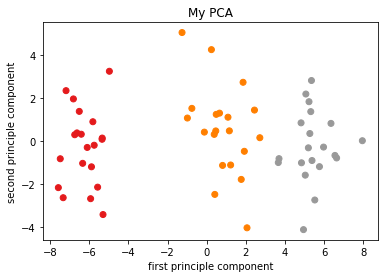

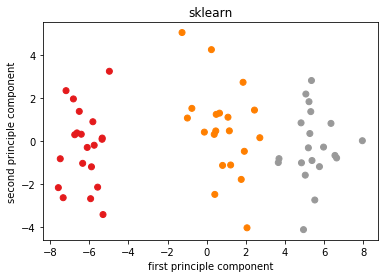

In [2]:
# generate data
np.random.seed(1)    

n = 20
p = 50

m1 = np.ones([n,p])
X1 = np.random.normal(0,1,[n,p])
X1 = X1 + m1

X2 = np.random.normal(0,1,[n,p])

X3 = np.random.normal(0,1,[n,p])
m3 = np.zeros([n,p])
m3[:,1:25] = -1
X3 += m3
X = np.vstack( [X1,X2,X3] )
label = np.repeat( [1,2,3] , 20)


# my own PCA
mypca = MyPCA()
values, vectors, PCs = mypca.fit(X, 2, 1000)

# there is no difference if we time -1 to PCs
plt.scatter(-PCs[0], -PCs[1], c = label, cmap = 'Set1')
plt.xlabel('first principle component')
plt.ylabel('second principle component')
plt.title('My PCA')
plt.show()


# PCA of sklearn
plt.figure()
pca = PCA(2)
X_low = pca.fit_transform(X)

plt.scatter(X_low[:,0], X_low[:,1], c = label, cmap = 'Set1')
plt.xlabel('first principle component')
plt.ylabel('second principle component')
plt.title('sklearn')
plt.show()

### Compare the explained varianced
As we can see from the plots above, the results of my own PCA and that of sklearn is identical. At least we cannot tell the difference from human vision. Another more quaitative way is to compare the variace on of the PCs, or say, the variance of the data projected on the principal directions. The results is shown as follows.

In [3]:
print( "PCA of sklearn, variance of PCs:", pca.explained_variance_  ) # sklearn

# My PCA
n = X.shape[0]
[varPC1] = sum( mypca.PCs[0]**2 )/(n-1) # sample variance 
[varPC2] = sum( mypca.PCs[1]**2 )/(n-1)

print( "My PCA, variance of PCs", [varPC1, varPC2]  )

PCA of sklearn, variance of PCs: [ 24.34602865   3.47836398]
My PCA, variance of PCs [24.34602864732161, 3.4783639801619985]


### Compare the estimated eigenvalues and eigenvectors
The results is nearly identical, so I can say that my own PCA performs quite well. Moreover, we can also comapre the eigenvalues and eigenvectors ( principal directions ). For eigenvectors, since there are all unit vectors, we can compare the angle between them. Equivalently, we can check the aboslute value of the inner product of two eigen vectors. If the value is near 1, it means the two vectors point to approximately the same directions.

In [4]:
dot1 = pca.components_[0,:].dot( mypca.e_vectors[0] )
dot2 = pca.components_[1,:].dot( mypca.e_vectors[1] )
print( "The inner products of PCs, PC1", dot1, "PC2", dot2 )
print( "Squared eigenvalues of PCA-sklearn:", pca.singular_values_**2 )
print( "Eigenvalues of My PCA:", mypca.e_values )

The inner products of PCs, PC1 [-1.] PC2 [-1.]
Squared eigenvalues of PCA-sklearn: [ 1436.41569019   205.22347483]
Eigenvalues of My PCA: [1436.4156901919744, 205.22347482955792]
